## Observations and Insights 

In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
mouse_data_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
number_of_mice = mouse_data_complete.drop_duplicates(subset="Mouse ID").count()
number_of_mice

Mouse ID              249
Drug Regimen          249
Sex                   249
Age_months            249
Weight (g)            249
Timepoint             249
Tumor Volume (mm3)    249
Metastatic Sites      249
dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_data_complete[mouse_data_complete.duplicated(['Mouse ID','Timepoint'])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
show_duplicates = mouse_data_complete.loc[mouse_data_complete['Mouse ID'] == 'g989']
show_duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = mouse_data_complete[mouse_data_complete['Mouse ID'] != 'g989']
clean_mouse_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_datacount = clean_mouse_data.drop_duplicates(subset="Mouse ID")
clean_mouse_datacount

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean_data = clean_mouse_data.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
median_data = clean_mouse_data.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
variance_data = clean_mouse_data.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
sd_data = clean_mouse_data.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
sem_data = clean_mouse_data.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]

# This method is the most straighforward, creating multiple series and putting them all together at the end.
output = pd.DataFrame({'Mean Volume' : mean_data, 'Median Volume': median_data, 
    'Volume Variance': variance_data, 'Standard Deviation' : sd_data, 'Sem' : sem_data  
})
output

,Mean Volume,Median Volume,Volume Variance,Standard Deviation,Sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# df.groupby('A').agg({'B': ['min', 'max'], 'C': 'sum'})
# This method produces everything in a single groupby function
single_function = clean_mouse_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean','median','var','std','sem']})
single_function

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Number of mice on each treatment')

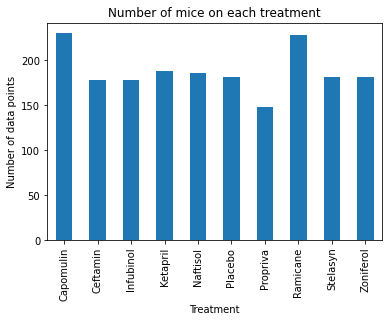

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

mice_by_drugs = clean_mouse_data.groupby('Drug Regimen').count()["Mouse ID"]
output1 = pd.DataFrame(mice_by_drugs)
output1.plot.bar(legend=False)

plt.ylabel('Number of data points')
plt.xlabel ('Treatment')
plt.title ('Number of mice on each treatment')


Text(0.5, 1.0, 'Number of mice on each treatment')

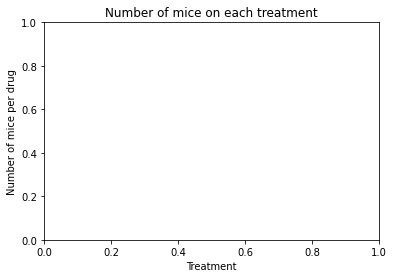

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# Data is stored in clean_mouse_data
x_axis = len(clean_mouse_data)





plt.ylabel('Number of mice per drug')
plt.xlabel ('Treatment')
plt.title ('Number of mice on each treatment')

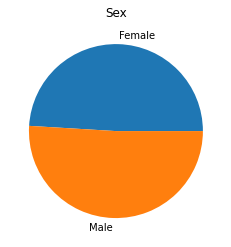

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_group = clean_mouse_data.groupby('Sex').count()['Mouse ID']

gender_list = gender_group.keys()

pan_gen_pie = gender_group.plot(kind="pie", y=gender_list, title=("Sex"))
pan_gen_pie.set_ylabel("")

plt.show()




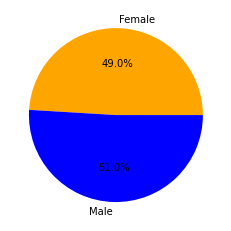

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_group = clean_mouse_data.groupby('Sex').count()['Mouse ID']
colors = ["orange","blue"]
gender = ["Female", "Male"]

plt.pie(gender_group, labels = gender, colors = colors,autopct="%1.1f%%" )
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# final_tumor_time = clean_mouse_data.groupby(['Drug Regimen','Mouse ID']).last()["Tumor Volume (mm3)"]
# final_tumor_time
final_tumor_time = clean_mouse_data.groupby(["Mouse ID", "Drug Regimen"]).agg(Timepoint=("Timepoint", 'max'))


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data2 = final_tumor_time.merge(clean_mouse_data, how='inner', on=["Mouse ID", "Drug Regimen", "Timepoint"])
merged_data2

,Mouse ID,Drug Regimen,Timepoint,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,45,Female,20,23,67.973419,2
1,a251,Infubinol,45,Female,21,25,65.525743,1
2,a262,Placebo,45,Female,17,29,70.717621,4
3,a275,Ceftamin,45,Female,20,28,62.999356,3
4,a366,Stelasyn,30,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,10,Female,12,26,48.710661,0
244,z578,Ramicane,45,Male,11,16,30.638696,0
245,z581,Infubinol,45,Female,24,25,62.754451,3
246,z795,Naftisol,45,Female,13,29,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in treatments:
    
    tumorvolume = merged_data2["Tumor Volume (mm3)"].loc[merged_data2["Drug Regimen"] == regimen]
    
    tumor_vol_data.append(tumorvolume)
    
    quartiles = tumorvolume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    print(f"Treatment: {regimen}")
    print(f"lower quartile Tumor Volume (mm3) {regimen} is {round(lowerq,3)}")
    print(f"upper quartile Tumor Volume (mm3) {regimen} is {round(upperq,3)}")
    print(f"median Tumor Volume (mm3) {regimen} is {round(quartiles[0.5],3)}")
    print(f"interquartile range {round(iqr,3)}")
    

    lowerbound = lowerq - (1.5*iqr)
    upperbound = upperq + (1.5*iqr)
    
    print(f"For {regimen} values below {round(lowerbound,3)} could be lower outliers")
    print(f"For {regimen} values above {round(upperbound,3)} could be upper outliers")
    
    loweroutliers= merged_data2["Drug Regimen"][merged_data2["Tumor Volume (mm3)"] < lowerbound].count()
    upperoutliers= merged_data2["Drug Regimen"][merged_data2["Tumor Volume (mm3)"] > upperbound].count()                                                                     
    outliers= loweroutliers + upperoutliers
    print(f"{outliers} posible outliers were found for {regimen}")
    print("------------------------------------------------")
    # Locate the rows which contain mice on each drug and get the tumor volumes

# box_data = tumor_vol_data["Tumor Volume (mm3)"]
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Treatment: Capomulin
lower quartile Tumor Volume (mm3) Capomulin is 32.377
upper quartile Tumor Volume (mm3) Capomulin is 40.159
median Tumor Volume (mm3) Capomulin is 38.125
interquartile range 7.782
For Capomulin values below 20.705 could be lower outliers
For Capomulin values above 51.832 could be upper outliers
146 posible outliers were found for Capomulin
------------------------------------------------
Treatment: Ramicane
lower quartile Tumor Volume (mm3) Ramicane is 31.56
upper quartile Tumor Volume (mm3) Ramicane is 40.659
median Tumor Volume (mm3) Ramicane is 36.562
interquartile range 9.099
For Ramicane values below 17.913 could be lower outliers
For Ramicane values above 54.307 could be upper outliers
132 posible outliers were found for Ramicane
------------------------------------------------
Treatment: Infubinol
lower quartile Tumor Volume (mm3) Infubinol is 54.049
upper quartile Tumor Volume (mm3) Infubinol is 65.526
median Tumor Volume (mm3) Infubinol is 60.165
interquar

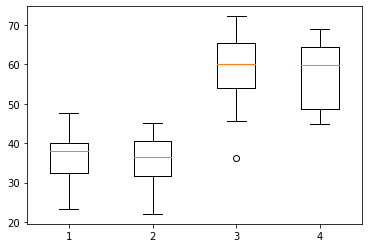

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Capomulin = clean_mouse_data.loc[clean_mouse_data['Drug Regimen'] == 'Capomulin','Tumor Volume (mm3)']
# Ramicane = clean_mouse_data.loc[clean_mouse_data['Drug Regimen'] == 'Ramicane','Tumor Volume (mm3)']
# Infubinol = clean_mouse_data.loc[clean_mouse_data['Drug Regimen'] == 'Infubinol','Tumor Volume (mm3)']
# Ceftamin = clean_mouse_data.loc[clean_mouse_data['Drug Regimen'] == 'Ceftamin','Tumor Volume (mm3)']


fig1, ax1 = plt.subplots()
# ax1.set_title('2')
# ax1.set_ylabel('1')
ax1.boxplot(tumor_vol_data)
plt.show()

## Line and Scatter Plots

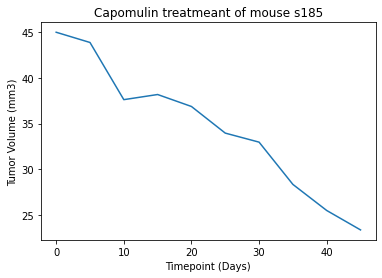

In [36]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_data = clean_mouse_data.loc[clean_mouse_data["Drug Regimen"] == "Capomulin",:]
capomulin_data
single_mouse_data = capomulin_data.loc[capomulin_data["Mouse ID"] == "s185"]
single_mouse_data
x_axis = single_mouse_data["Timepoint"]
tum_vol = single_mouse_data["Tumor Volume (mm3)"]

plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatmeant of mouse s185')
plt.plot(x_axis, tum_vol)
plt.show()

Text(0, 0.5, 'Average Tumor Volume')

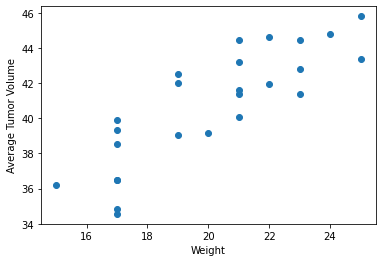

In [44]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# using capomulin_data
cap_ave = capomulin_data.groupby(["Mouse ID"]).mean()
plt.scatter(cap_ave['Weight (g)'],cap_ave['Tumor Volume (mm3)'])

plt.xlabel('Weight')
plt.ylabel('Average Tumor Volume')


## Correlation and Regression

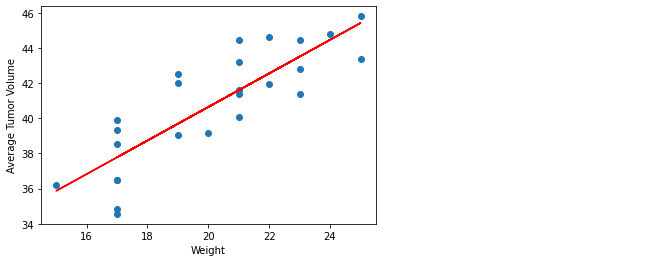

In [60]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = cap_ave['Weight (g)']
y_values = cap_ave['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,40),fontsize=15,color="red")
plt.xlabel('Weight')
plt.ylabel('Average Tumor Volume')
plt.show()